In [3]:
using Turing, Distributions, Random, MCMCChains, Plots, StatsPlots, Measures, BSON
#Load utility functions
include("utility_functions.jl")
# Random seed for reproducibility
Random.seed!(1234)

TaskLocalRNG()

In [5]:
BSON.@load "Posterior_Samples/level2_posterior_samples_test1_mixed.bson" posterior_samples_test1_mixed
BSON.@load "Posterior_Samples/level2_posterior_samples_test2_mixed.bson" posterior_samples_test2_mixed
BSON.@load "Posterior_Samples/level2_posterior_samples_test1_uniform.bson" posterior_samples_test1_uniform
BSON.@load "Posterior_Samples/level2_posterior_samples_test2_uniform.bson" posterior_samples_test2_uniform

In [21]:
posterior_samples_test1_mixed[1]

Dict{Symbol, Vector{Vector{Float64}}} with 3 entries:
  :alpha => [[0.743992, 0.535311, 0.534194, 0.534194, 0.485016, 0.661291, 0.905…
  :beta  => [[0.195426, 0.486016, 0.307983, 0.307983, 0.39117, 0.593565, 0.6387…
  :theta => [[0.106986, 0.345584, 0.0301219, 0.0301219, 0.424448, 0.99818, 0.98…

In [354]:
# Define a function to calculate means and store them in a new dictionary
function cycle_through_data_with_means(posterior_samples)
    # Initialize a dictionary to store the mean values for each container and parameter
    means_dict = Dict{Int, Dict{Symbol, Vector{Float64}}}()

    # Loop over each container
    for container in keys(posterior_samples)
        # Initialize a nested dictionary for each container
        means_dict[container] = Dict{Symbol, Vector{Float64}}()

        # Loop over each parameter in the current container
        for param in keys(posterior_samples[container])
            # Initialize an empty vector to store mean values for each sample index of this parameter
            means_dict[container][param] = []

            # Loop over each sample in the current parameter
            num_samples = length(posterior_samples[container][param])
            for sample_idx in 1:num_samples
                # Get the value at the current sample index
                value = posterior_samples[container][param][sample_idx]
                
                # Calculate the mean (assuming 'value' is a vector of samples for the given index)
                sample_mean = mean(value)
                
                # Store the mean in the dictionary for this parameter
                push!(means_dict[container][param], sample_mean)
            end
        end
    end
    return means_dict
end

# Example usage
means_dict = sort(cycle_through_data_with_means(posterior_samples_test1_mixed))

OrderedDict{Int64, Dict{Symbol, Vector{Float64}}} with 11 entries:
  1  => Dict(:alpha=>[0.734779, 0.664473, 0.839615, 0.795373, 0.887042, 0.84524…
  2  => Dict(:alpha=>[0.960567, 0.931821, 1.06348, 1.11268, 1.06796, 1.06165, 1…
  3  => Dict(:alpha=>[1.17319, 1.12103, 1.11972, 1.34371, 1.39914, 1.29876, 1.3…
  4  => Dict(:alpha=>[1.41591, 1.41838, 1.51779, 1.54356, 1.55858, 1.57387, 1.6…
  5  => Dict(:alpha=>[1.6043, 1.59874, 1.80725, 1.79526, 1.8085, 1.75262, 1.810…
  6  => Dict(:alpha=>[1.82653, 1.83889, 1.76845, 1.92482, 1.99403, 2.04683, 2.0…
  7  => Dict(:alpha=>[2.07023, 2.01947, 1.98311, 1.91304, 2.19417, 2.2389, 2.21…
  8  => Dict(:alpha=>[2.2107, 2.24502, 2.15121, 2.36025, 2.37114, 2.32388, 2.38…
  9  => Dict(:alpha=>[2.4266, 2.41763, 2.56776, 2.52968, 2.57226, 2.6022, 2.631…
  10 => Dict(:alpha=>[2.59467, 2.61787, 2.721, 2.65315, 2.74741, 2.70706, 2.724…
  11 => Dict(:alpha=>[2.84156, 2.75627, 2.75509, 2.67648, 2.58929, 2.57228, 2.5…

In [360]:
# Define a function to calculate means and store them in a new dictionary, ignoring the first sample
function cycle_through_data_with_means(posterior_samples)
    # Initialize a dictionary to store the mean values for each container and parameter
    means_dict = Dict{Int, Dict{Symbol, Vector{Float64}}}()

    # Loop over each container
    for container in keys(posterior_samples)
        # Initialize a nested dictionary for each container
        means_dict[container] = Dict{Symbol, Vector{Float64}}()

        # Loop over each parameter in the current container
        for param in keys(posterior_samples[container])
            # Initialize an empty vector to store mean values for each sample index of this parameter
            means_dict[container][param] = []

            # Loop over each sample in the current parameter, starting from the second sample
            num_samples = length(posterior_samples[container][param])
            for sample_idx in 2:num_samples  # Start from the second sample
                # Get the value at the current sample index
                value = posterior_samples[container][param][sample_idx]
                
                # Calculate the mean (assuming 'value' is a vector of samples for the given index)
                sample_mean = mean(value)
                
                # Store the mean in the dictionary for this parameter
                push!(means_dict[container][param], sample_mean)
            end
        end
    end
    return means_dict
end

# Example usage
means_dict = cycle_through_data_with_means(posterior_samples_test1_mixed)
means_dict[11][:alpha][30]

2.113797802703777

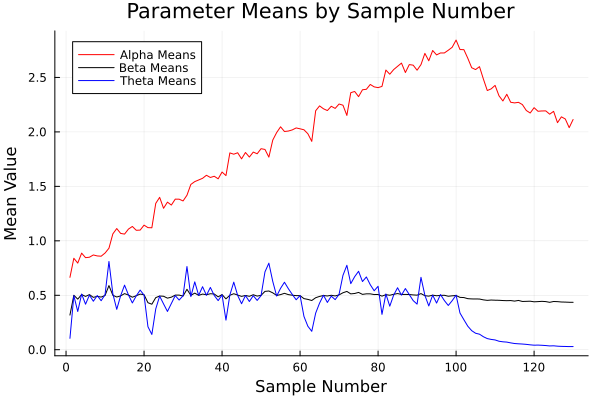

In [370]:
# Sort containers and extract alpha means in correct order
alpha_means = vcat([means_dict[container][:alpha] for container in sort(collect(keys(means_dict)))]...)
beta_means = vcat([means_dict[container][:beta] for container in sort(collect(keys(means_dict)))]...)
theta_means = vcat([means_dict[container][:theta] for container in sort(collect(keys(means_dict)))]...)


# Create an x-axis vector representing the sample indices
x_axis = 1:length(alpha_means)

# Plot alpha means vs. sample index
plot(x_axis, alpha_means, label="Alpha Means", xlabel="Sample Number", ylabel="Mean Value", color=:red, title="Parameter Means by Sample Number")
plot!(beta_means, color = :black, label="Beta Means")
plot!(theta_means, color = :blue, label="Theta Means")
#plot!((alpha_means.*beta_means), color = :black, label="Alpha*Beta")

In [350]:
(alpha_means.*beta_means)

130-element Vector{Float64}:
 0.22461709665560503
 0.19789928030053638
 0.19549377329589365
 0.1857631823223175
 0.19466823591054902
 0.17105374195095854
 0.1801034660193923
 0.17242954467742777
 0.3102998166310849
 0.15539175065421165
 0.22786248201298512
 0.21080833059431783
 0.19827734963921306
 ⋮
 0.09997398887181332
 0.1036075402214299
 0.1022565002541829
 0.08653186605034166
 0.10596073762658845
 0.10490495817559227
 0.10476733888069137
 0.10032959371167814
 0.10183661657687883
 0.10515687716650508
 0.09428644628586035
 0.09057160355503914

Alpha mean :0.04848277692648837
Beta mean :0.014279390871318028
Theta mean :0.08364281808081697


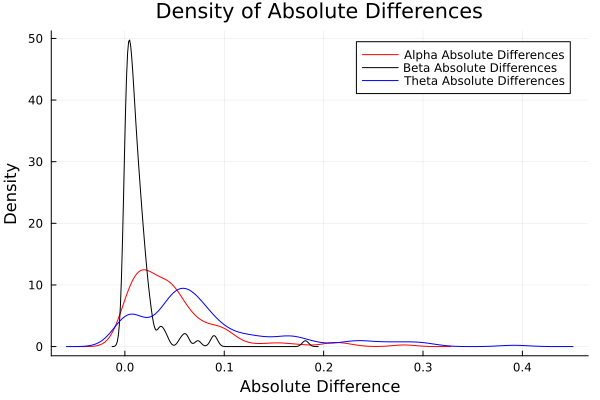

In [376]:
# Function to calculate mean differences between consecutive elements
function calculate_differences(means_vector)
    diff_vector = []
    for i in 2:length(means_vector)
        push!(diff_vector, means_vector[i] - means_vector[i - 1])
    end
    return diff_vector
end

# Calculate mean differences for alpha, beta, and theta
alpha_differences = calculate_differences(alpha_means)
beta_differences = calculate_differences(beta_means)
theta_differences = calculate_differences(theta_means)

# Calculate absolute differences for each parameter
alpha_abs_differences = abs.(alpha_differences)
beta_abs_differences = abs.(beta_differences)
theta_abs_differences = abs.(theta_differences)

# Plot density plots for each parameter's absolute differences
println("Alpha mean :",mean(alpha_abs_differences))
println("Beta mean :",mean(beta_abs_differences))
println("Theta mean :",mean(theta_abs_differences))
density(alpha_abs_differences, color = :red, label="Alpha Absolute Differences", xlabel="Absolute Difference", ylabel="Density", title="Density of Absolute Differences")
density!(beta_abs_differences, color = :black, label="Beta Absolute Differences")
density!(theta_abs_differences, color = :blue, label="Theta Absolute Differences")
